In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_19980\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m30_v30_L2_s2=torch.tensor([[[1.0000e+02, 5.4525e+01, 5.7143e-02, 6.3010e+01],
         [1.0000e+02, 2.6696e+01, 0.0000e+00, 9.0300e+01],
         [9.9989e+01, 3.6998e+01, 3.4602e-01, 9.3500e+01],
         [1.0000e+02, 4.9329e+01, 0.0000e+00, 9.6780e+01],
         [9.9848e+01, 4.4444e+01, 0.0000e+00, 9.8750e+01],
         [9.9849e+01, 5.1667e+01, 4.3478e+00, 9.9340e+01],
         [9.9859e+01, 5.0000e+01, 0.0000e+00, 9.9590e+01],
         [9.9850e+01, 4.3750e+01, 0.0000e+00, 9.9750e+01],
         [9.9880e+01, 7.1429e+01, 0.0000e+00, 9.9860e+01],
         [9.9850e+01, 4.0000e+01, 0.0000e+00, 9.9820e+01]],

        [[1.0000e+02, 4.9759e+01, 1.9150e+00, 3.3700e+01],
         [9.1662e+01, 2.4954e+01, 3.6743e+00, 5.5790e+01],
         [9.9406e+01, 4.0872e+01, 2.7383e+00, 8.0480e+01],
         [9.9893e+01, 3.7793e+01, 2.3018e+00, 8.8650e+01],
         [9.9650e+01, 3.1963e+01, 3.0612e+00, 9.3310e+01],
         [9.9791e+01, 2.7381e+01, 4.0541e+00, 9.6650e+01],
         [9.9826e+01, 2.9327e+01, 0.0000e+00, 9.7920e+01],
         [9.9838e+01, 2.7473e+01, 5.0000e+00, 9.8990e+01],
         [9.9779e+01, 3.6364e+01, 0.0000e+00, 9.9400e+01],
         [9.9789e+01, 1.4286e+01, 0.0000e+00, 9.9410e+01]],

        [[1.0000e+02, 6.2432e+01, 2.6753e+00, 1.6620e+01],
         [7.9118e+01, 3.4922e+01, 2.5722e+00, 1.8930e+01],
         [9.2131e+01, 2.5470e+01, 3.1167e+00, 3.7070e+01],
         [9.3859e+01, 2.3803e+01, 3.3197e+00, 5.4470e+01],
         [9.6317e+01, 2.0063e+01, 2.1062e+00, 6.9040e+01],
         [9.7907e+01, 2.3840e+01, 3.2258e+00, 8.1560e+01],
         [9.8850e+01, 2.6417e+01, 4.1667e+00, 9.0260e+01],
         [9.9310e+01, 2.9143e+01, 3.7736e+00, 9.5120e+01],
         [9.9785e+01, 3.5950e+01, 0.0000e+00, 9.8140e+01],
         [9.9899e+01, 7.0455e+01, 0.0000e+00, 9.9620e+01]],

        [[1.0000e+02, 6.5947e+01, 2.9896e+00, 6.1000e+00],
         [6.7376e+01, 2.8754e+01, 3.0543e+00, 6.5800e+00],
         [7.0902e+01, 2.2191e+01, 3.3365e+00, 1.0610e+01],
         [7.5333e+01, 1.8232e+01, 2.9871e+00, 1.9970e+01],
         [8.5811e+01, 1.6716e+01, 3.2906e+00, 3.6360e+01],
         [8.9563e+01, 1.7672e+01, 3.4157e+00, 5.5660e+01],
         [9.4084e+01, 2.5253e+01, 5.9867e+00, 7.6510e+01],
         [9.8896e+01, 4.9036e+01, 1.5842e+01, 9.3400e+01],
         [9.9928e+01, 8.2095e+01, 3.3333e+01, 9.9280e+01],
         [9.9990e+01, 9.6000e+01, 0.0000e+00, 9.9970e+01]],

        [[1.0000e+02, 8.6364e+01, 3.6045e+00, 4.1700e+00],
         [6.9231e+01, 2.8720e+01, 3.2378e+00, 4.0600e+00],
         [6.0000e+01, 2.2986e+01, 3.2744e+00, 5.2500e+00],
         [5.2469e+01, 1.5248e+01, 3.4796e+00, 7.3900e+00],
         [7.5039e+01, 1.6472e+01, 3.3044e+00, 1.7030e+01],
         [7.0524e+01, 1.4420e+01, 4.2137e+00, 3.0760e+01],
         [8.2637e+01, 2.3959e+01, 5.6088e+00, 6.0230e+01],
         [9.8908e+01, 7.1568e+01, 2.3596e+01, 9.5430e+01],
         [9.9990e+01, 9.2647e+01, 1.0000e+02, 9.9890e+01],
         [1.0000e+02, 1.0000e+02, 0.0000e+00, 1.0000e+02]],

        [[1.0000e+02, 8.0769e+01, 3.3490e+00, 3.5600e+00],
         [6.6667e+01, 3.8095e+01, 3.0099e+00, 3.2500e+00],
         [6.6667e+01, 2.6316e+01, 3.3176e+00, 3.8800e+00],
         [3.8462e+01, 1.3231e+01, 3.2497e+00, 3.9900e+00],
         [8.0292e+01, 1.6736e+01, 3.0001e+00, 6.7100e+00],
         [4.7129e+01, 1.1972e+01, 3.1814e+00, 1.1240e+01],
         [4.2348e+01, 1.7167e+01, 7.5665e+00, 2.8370e+01],
         [9.9747e+01, 9.5508e+01, 6.6667e+01, 9.9500e+01],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 1.0000e+02],
         [1.0000e+02, 0.0000e+00, 0.0000e+00, 1.0000e+02]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)

m30_v30_L2_s2.size()

torch.Size([6, 10, 4])

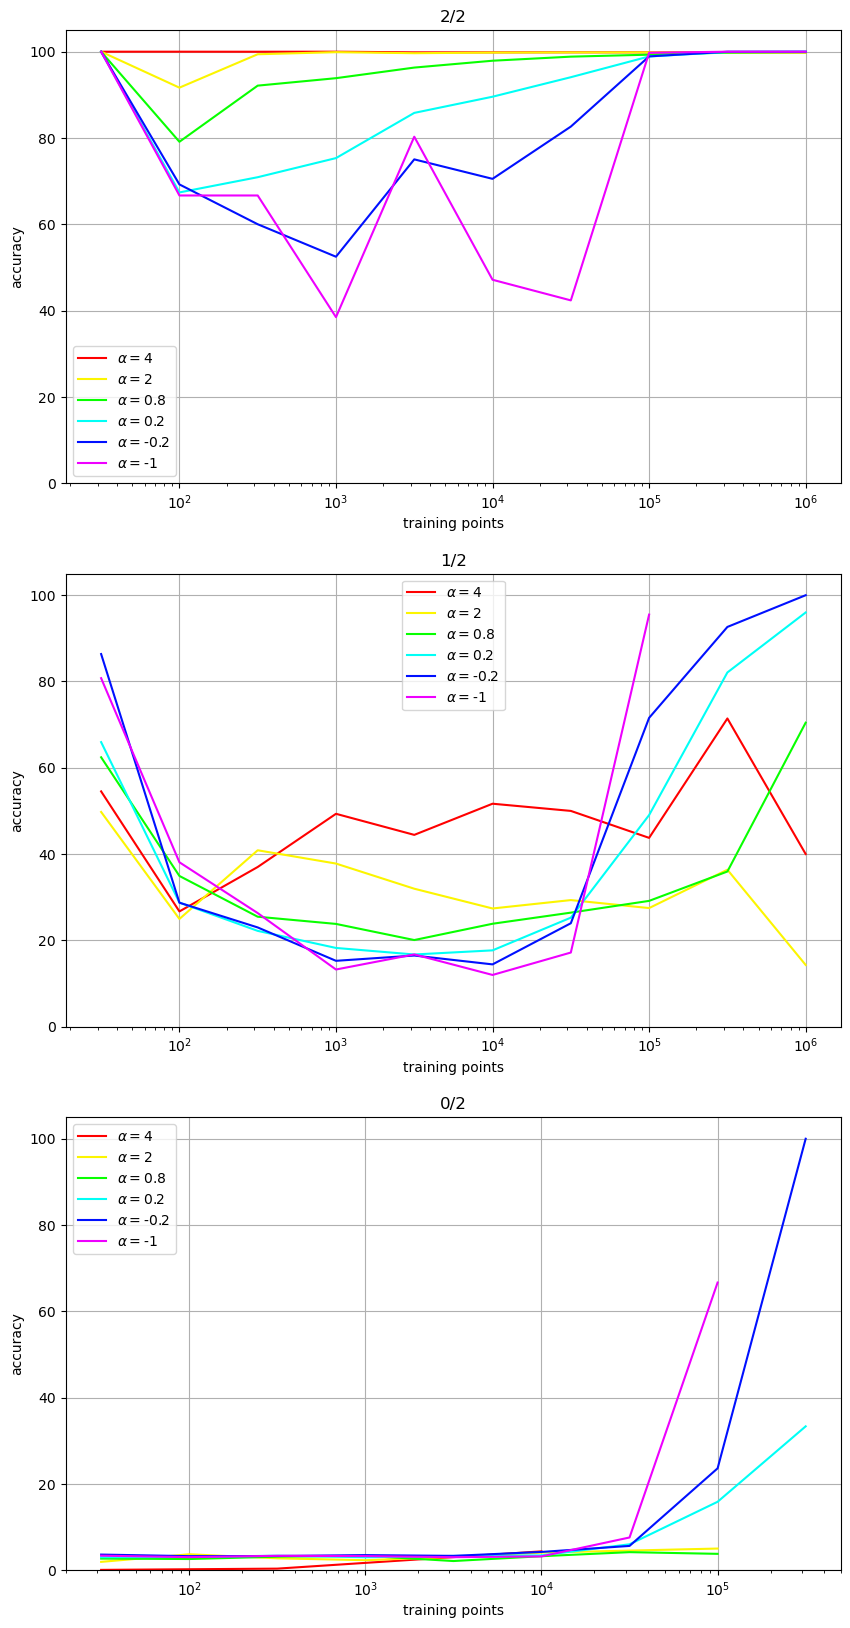

In [3]:
fig, axis = plt.subplots(3, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["2/2", "1/2", "0/2"]
for i in range(3):
    for j in range(6):
        data = m30_v30_L2_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


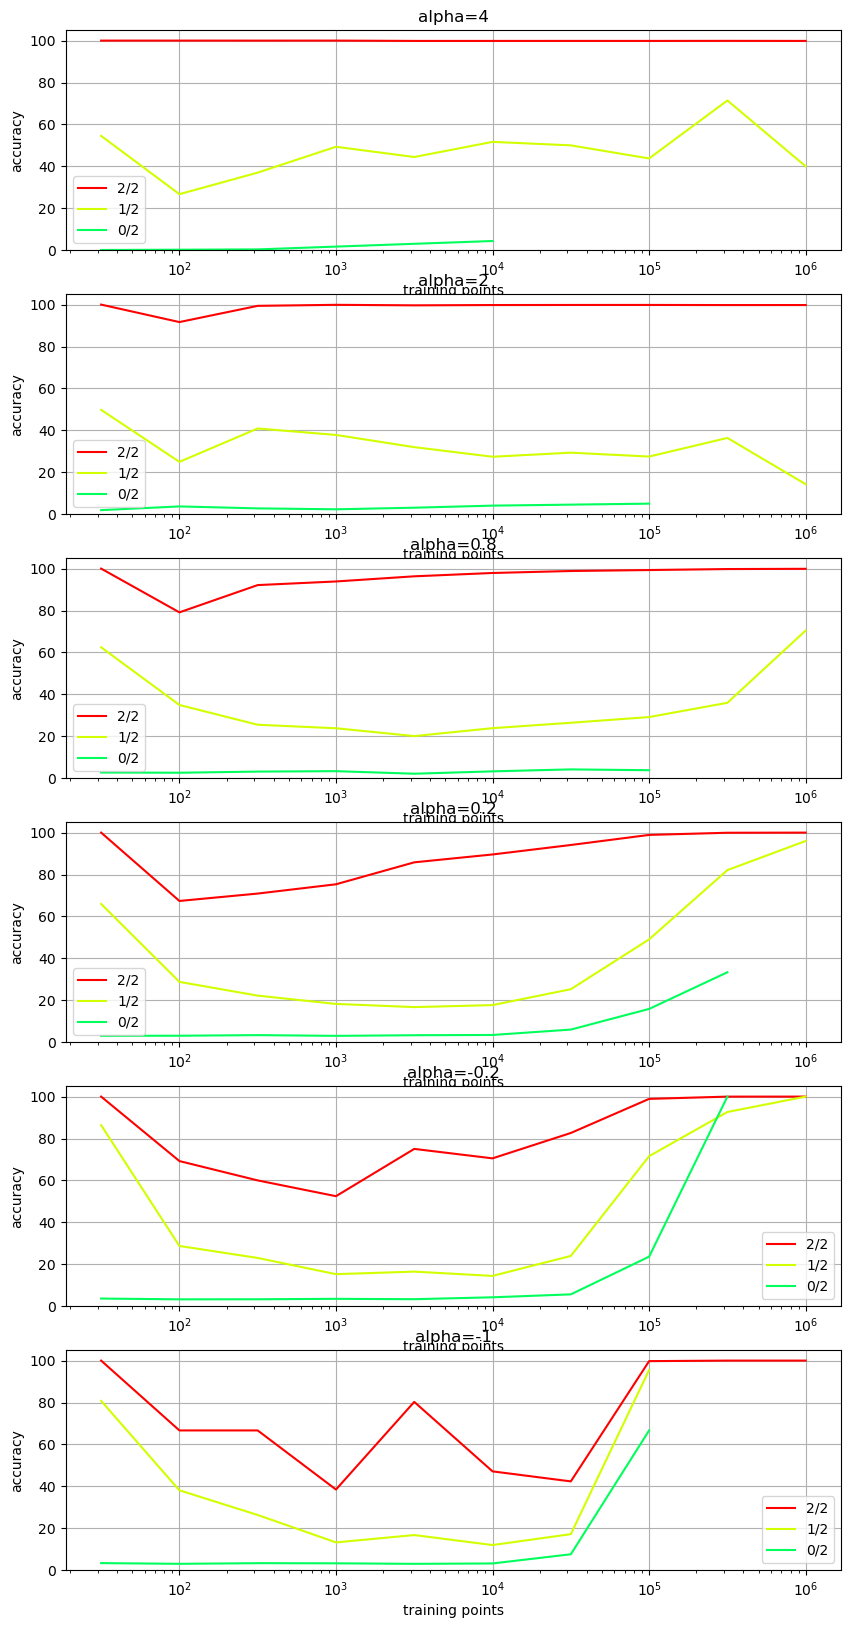

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["2/2", "1/2", "0/2"]
for j in range(6):
    for i in range(3):
        data = m30_v30_L2_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    